In [1]:
import pandas as pd
import numpy as np

I've accessed the https://siemsizingcalculator.logpoint.com/ on the 2/02/2021 and select one of each type of device.

In [2]:
df = pd.read_csv("reverse.txt", sep="\n", header=None)
df

,0
0,Log Types
1,Nodes
2,EPS
3,GB/day
4,Windows Servers - HIGH EPS (Event Log)
...,...
83,1.21
84,Total
85,20
86,839


In [3]:
df_reshaped = pd.DataFrame(np.reshape(df.values,(-1,4)), columns =['Log Types','Nodes','EPS','GB/day']).drop([0]).reset_index(drop=True)
df_reshaped

,Log Types,Nodes,EPS,GB/day
0,Windows Servers - HIGH EPS (Event Log),1,7.00,0.39
1,Windows Servers - MED EPS (Event Log),1,3.00,0.17
2,Windows Servers - LOW EPS (Event Log),1,1.00,0.06
3,Windows Desktops (Laptops / tablets / POS),1,0.00,0.00
4,Network Switches,1,2.00,0.02
5,Network Routers,1,1.00,0.02
6,Network Firewalls (Layer 7 Internal),1,240.00,9.66
7,Network VPN / SSL VPN,1,2.00,0.05
8,Network Flows (NetFlow/S-Flow),1,30.00,0.97
9,Other Network Devices,1,10.00,0.20


In [6]:
df_reshaped = df_reshaped.drop([20])

In [7]:
df_reshaped['GB/month'] = df_reshaped['GB/day'].apply(lambda x: float(x)*30)
df_reshaped

,Log Types,Nodes,EPS,GB/day,GB/month
0,Windows Servers - HIGH EPS (Event Log),1,7.00,0.39,11.7
1,Windows Servers - MED EPS (Event Log),1,3.00,0.17,5.1
2,Windows Servers - LOW EPS (Event Log),1,1.00,0.06,1.8
3,Windows Desktops (Laptops / tablets / POS),1,0.00,0.00,0.0
4,Network Switches,1,2.00,0.02,0.6
5,Network Routers,1,1.00,0.02,0.6
6,Network Firewalls (Layer 7 Internal),1,240.00,9.66,289.8
7,Network VPN / SSL VPN,1,2.00,0.05,1.5
8,Network Flows (NetFlow/S-Flow),1,30.00,0.97,29.1
9,Other Network Devices,1,10.00,0.20,6.0


In [9]:
df_reshaped['proportion EPS/(GB/month)'] = df_reshaped['EPS'].astype(float)/df_reshaped['GB/month'].astype(float)

In [10]:
df_reshaped

,Log Types,Nodes,EPS,GB/day,GB/month,proportion EPS/(GB/month)
0,Windows Servers - HIGH EPS (Event Log),1,7.00,0.39,11.7,0.598291
1,Windows Servers - MED EPS (Event Log),1,3.00,0.17,5.1,0.588235
2,Windows Servers - LOW EPS (Event Log),1,1.00,0.06,1.8,0.555556
3,Windows Desktops (Laptops / tablets / POS),1,0.00,0.00,0.0,NaN
4,Network Switches,1,2.00,0.02,0.6,3.333333
5,Network Routers,1,1.00,0.02,0.6,1.666667
6,Network Firewalls (Layer 7 Internal),1,240.00,9.66,289.8,0.828157
7,Network VPN / SSL VPN,1,2.00,0.05,1.5,1.333333
8,Network Flows (NetFlow/S-Flow),1,30.00,0.97,29.1,1.030928
9,Other Network Devices,1,10.00,0.20,6.0,1.666667


<AxesSubplot:>

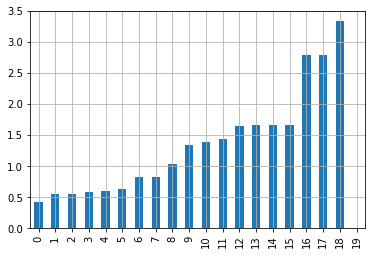

In [19]:
df_reshaped['proportion EPS/(GB/month)'].sort_values().reset_index(drop=True).plot(kind='bar',grid=True)

In [20]:
df_reshaped['proportion EPS/(GB/month)'].mean()

1.3530413644795118

In [21]:
df_reshaped['proportion EPS/(GB/month)'].median()

1.3333333333333333